# Wine dataset - MIN0150

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

In [2]:
df_full = pd.read_csv('https://sch.patrick115.eu/wine-clustering.csv', sep=',', storage_options={'User-Agent': 'Mozilla/5.0'})
df_full

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Když se podíváme na Kaggle, tak dataset teda obsahuje výsledky chemické analýzy vína, které rostly ve stejné oblasti v Itálii,a le pocházejí ze tří různých kultivarů. 

Primárně tipuju, že vína se rozdělí do clusterů podobně, jako se třeba prodávají v obchodech, tedy na bílá, červená a růžová vína, případně různé další, o kterých třeba nevím.

V dastasetu máme celkem 178 záznamů a z analýzy 13 atributů.
Atributy jsou následující:

-   Alcohol - obsah alkoholu v %
-   Malic acid - obsah kyseliny jablečné (svěží a ostrá chuť)
-   Ash - obsah popela
-   Alcalinity of ash - zásaditost popela
-   Magnesium - obsah hořčíku
-   Total phenols - celkový obsah fenolů (chuť a barva)
-   Flavanoids - obsah flavonoidů (hořkost)
-   Nonflavanoid phenols - obsah ne-flavonoidních fenolů (barva a chuť)
-   Proanthocyanins - zodpovědné za síravost vína
-   Color intensity - intenzita barvy
-   Hue - odstín vína
-   OD280/OD315 of diluted wines - optická hustota při 280/315 nm
-   Proline - obsah prolinu (chuť)

Když se podíváme, tak dataset neobsahuje žádné chybějící hodnoty, takže se nemusíme starat o nějaké dropování/doplňování hodnot.


In [3]:
df_full.isna().sum().sort_values(ascending=False)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Všechny sloupce mají numerický datový typ, takže nemusíme dělat žádné enkódování kategorických proměnných.

In [4]:
df_full.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

Když se ještě podrobněji podíváme na jednotlivé sloupce, tak:
Rozsah hodnot:
- Alkohol se pohybuje v rozmezí 11.03 až 14.83, bude pravděpodobně v %.
- Největší rozpětí zde má Proline, který se pohybuje od 278 až do 1680.
- Překvapivě většina sloupců nemá ani takový rozsah hodnot, kromě ještě Ash_Alcanity a Magnesium




In [5]:
df_full.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Dost mě zajímá, jaké rozpoložení tady mají obsahy alkoholu ve vínech, takže si to zkusím zobrazit pomocí histogramu.

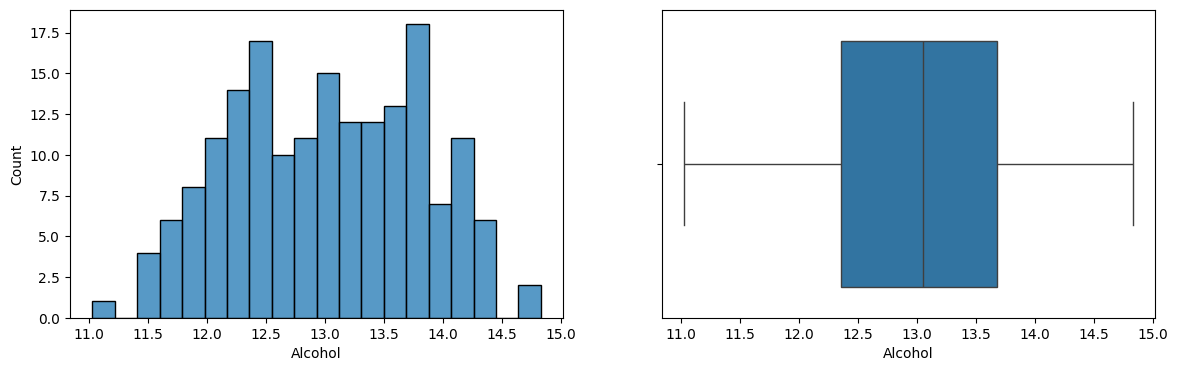

In [6]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_full["Alcohol"], bins=20)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_full["Alcohol"])
plt.show()

Distribuced alkoholu připomíná mírně gausovu křivku, ale je vidět, že prostředek je více siřší a převládá tady obsah alkoholu okolo 13.75%.
Na boxplotu můžeme vidět že nemáme žádné outliery, takže se nemusíme starat o žádné odlehlé hodnoty.

Pro zajímavost mě ještě zajímá sloupec Proline, jestli zde není nějaký outlier, takže si to zkusím zobrazit pomocí histplotu a boxplotu, stejně jako u alkoholu.

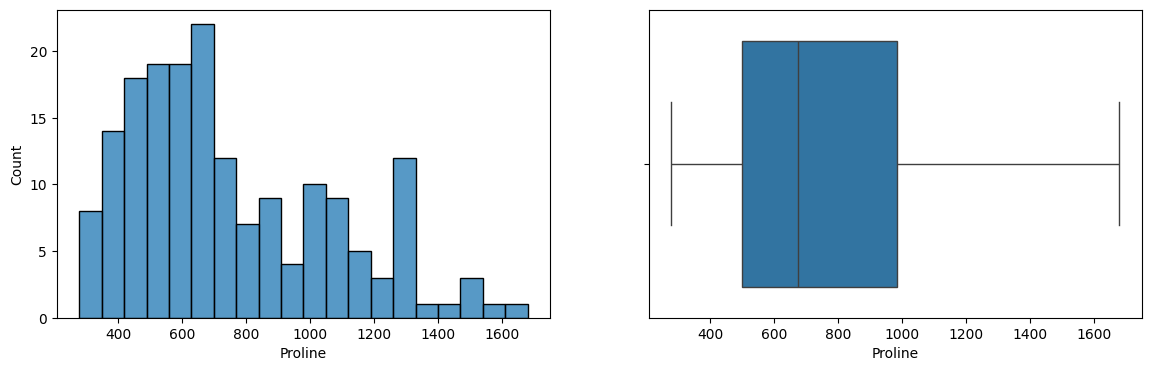

In [7]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_full["Proline"], bins=20)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_full["Proline"])
plt.show()

Můžeme vidět, že nakonec žádný outlier zde není, ale primárně se hodnoty drží mezi 400 - 800.

Tento dataset podle Kagglu je krásně očištěny, takže očekávám, že se tady žádný outlier neojeví, ale pro jistotu si to zkusím zobrazit pomocí boxplotů.

13


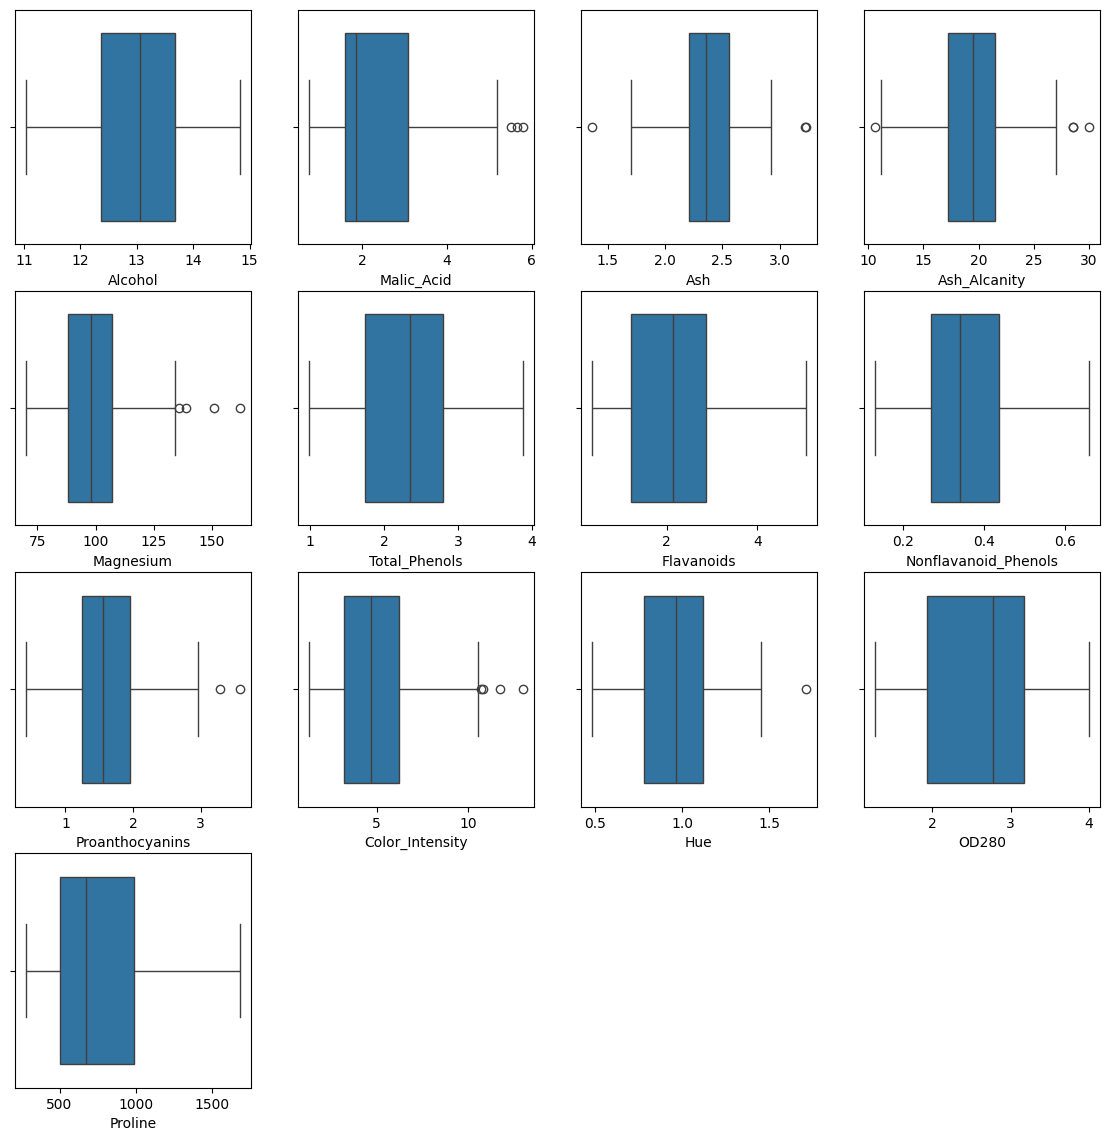

In [8]:
cols = df_full.columns

print(len(cols)) # 13 4x4

plt.figure(figsize=(14, 14))

i = 0
for col in cols:
    i = i + 1
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_full[col])
plt.show()


Tak jsem se mýlil, outlieři tady jsou, né moc, maximálně 4 a to u Color_Intensity. Zatím zde zkusím outliery nechat a když tak pokud budou v clusteringu dělat nepořádek, tak se k nim vrátím a zkusím je odstranit.

Nyní se pojďmě podívat na kolerační matici, abychom zjístil, jak jsou na sobě jednotlivé sloupce atributy závislé.

<Axes: >

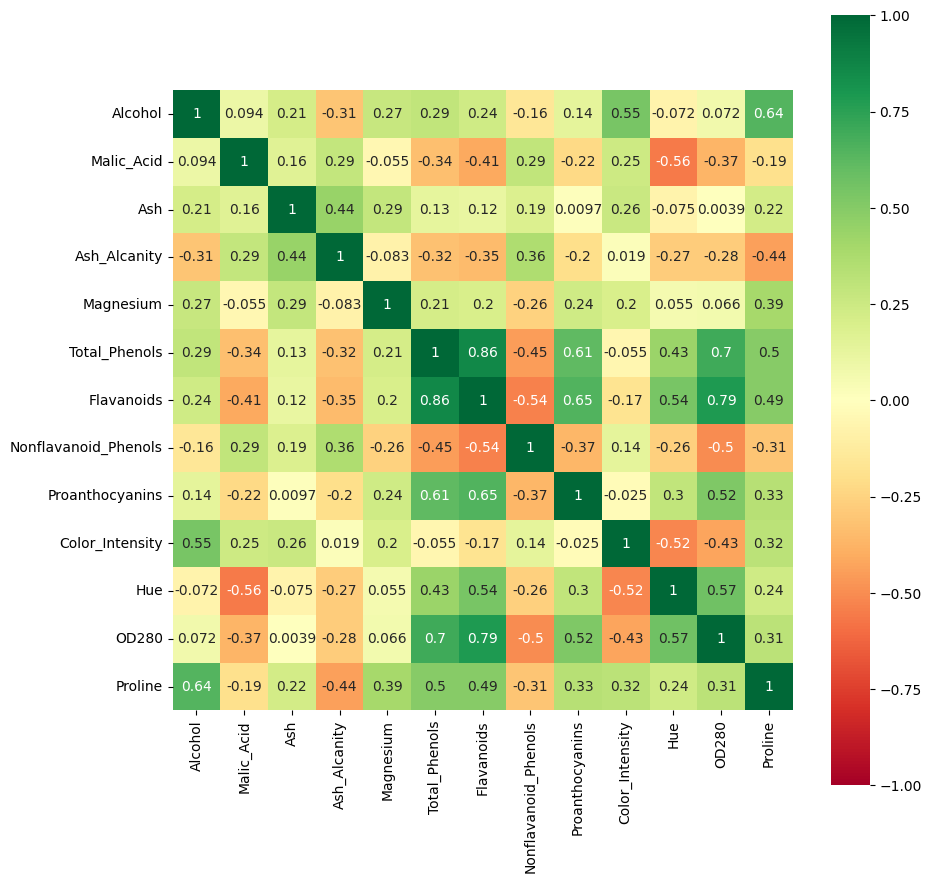

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df_full.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)

Když se podíváme, tak velmi vysokou korelaci mají Flavonoidy a Total Phenols, což dává smysl, protože Flavanoidy jsou podskupinou fenolický látek (což udává právě Total Phenols - celkový obsah fenolů). 

Další velkou korelaci má OD280/OD315 a Flavonoidy, s tím že vlastně OD280/OD315 měří k odhadu koncentrace fenolů ve vínech, proto to také koleruje s Total Phenols. 

Další korelace je tady mezi obsahem Prolinu a Alkoholu. 
Další kolerace je mezi obsahem alkoholu a barevnou intenzitou.

Jdeme teď k negativním koleracím a největší je tady závislos odstínu a obsahu kyseliny jablečné.
Další negativní koleraci máme mezi odstínem a barevnou intenzitou, s tím že pravděpodobně to bude znametat, že barevná intenzita bude udávat tmavost vína a tím pádem bude barevná intenzita menší.
Dost negativní koleraci máme i mezi OD280/OD315 a Obsahem nonflavoidních fenolů.
Pak tady máme negativní koleraci mezi Prolinem a zásaditosti popela, z toho důvodu, že prolin je kyselina, tedy bude mít negativní koleraci s zásaditostí popela.

Nyní se pojďme podívat na clustering, jak jsme zmiňoval na začátku, tak očekávám, že se vína rozdělí podle reálného rozdělení, tedy na bílá, červená a růžová vína...

S tím že nemáme žádné chybějící hodnoty, tak nebudeme muset nic řešit.

Bude určitě potřeba data našklálovat, tak se jdeme podívat na všechny sloupce.

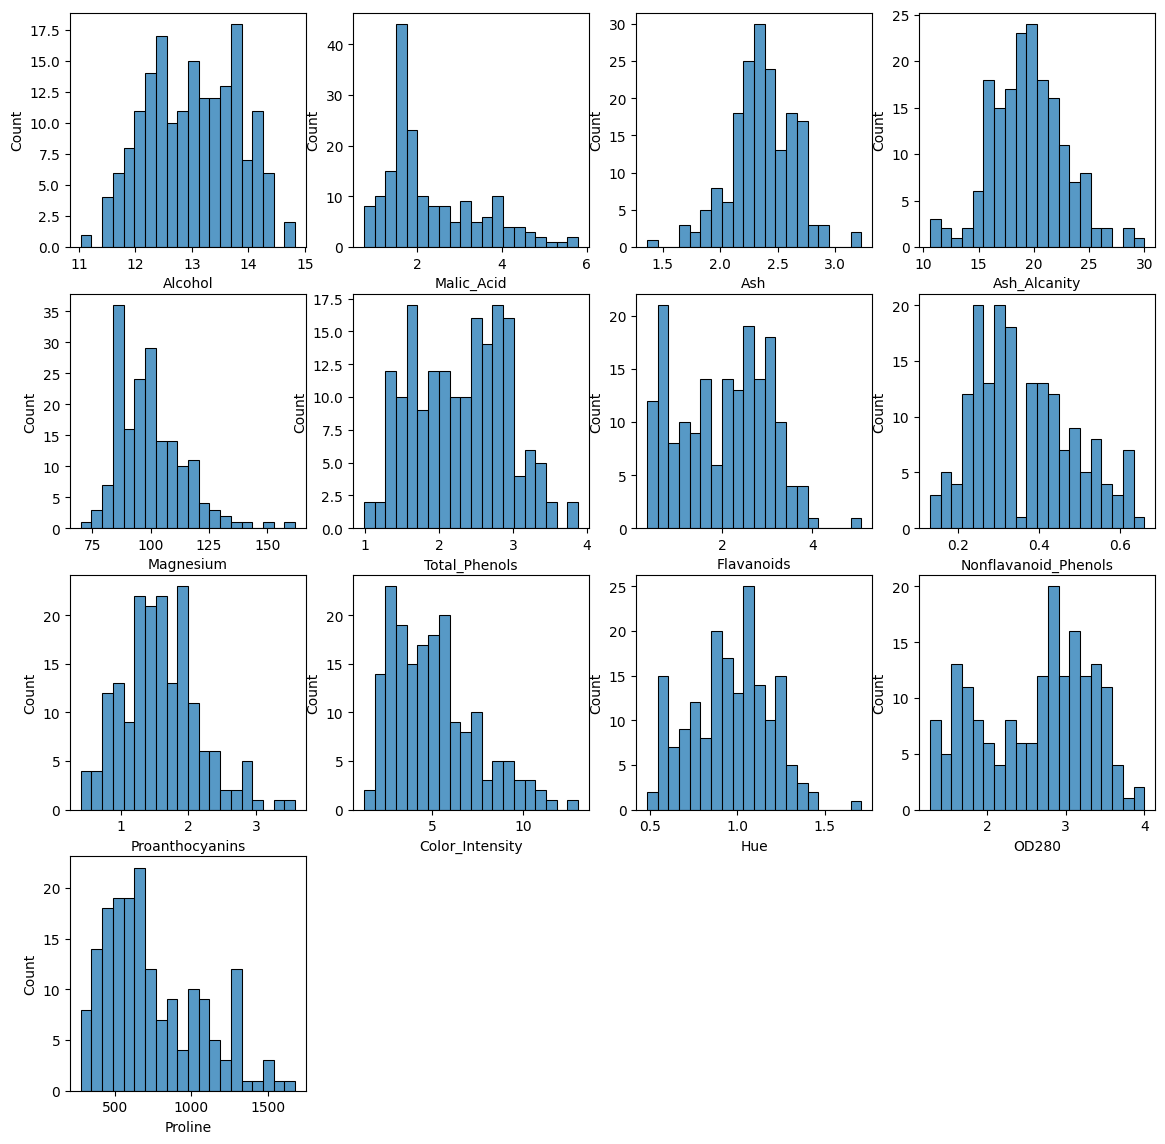

In [10]:
plt.figure(figsize=(14,14))

i = 0
for column in cols:
    i = i + 1
    plt.subplot(4, 4, i)
    sns.histplot(df_full[column], bins=20)

plt.show()

Když se podíváme na data, tak vyloženě všechny by se mohly přeškálovat pomocí minmax scaleru, s tím že u Malic_Acid a Magnesium by se dal použít power transformer, ale začneme pouze s minmax scalerem.

In [11]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

encoded = pd.DataFrame(index=df_full.index)

encoded[cols] = scaler.fit_transform(df_full[cols])

encoded

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


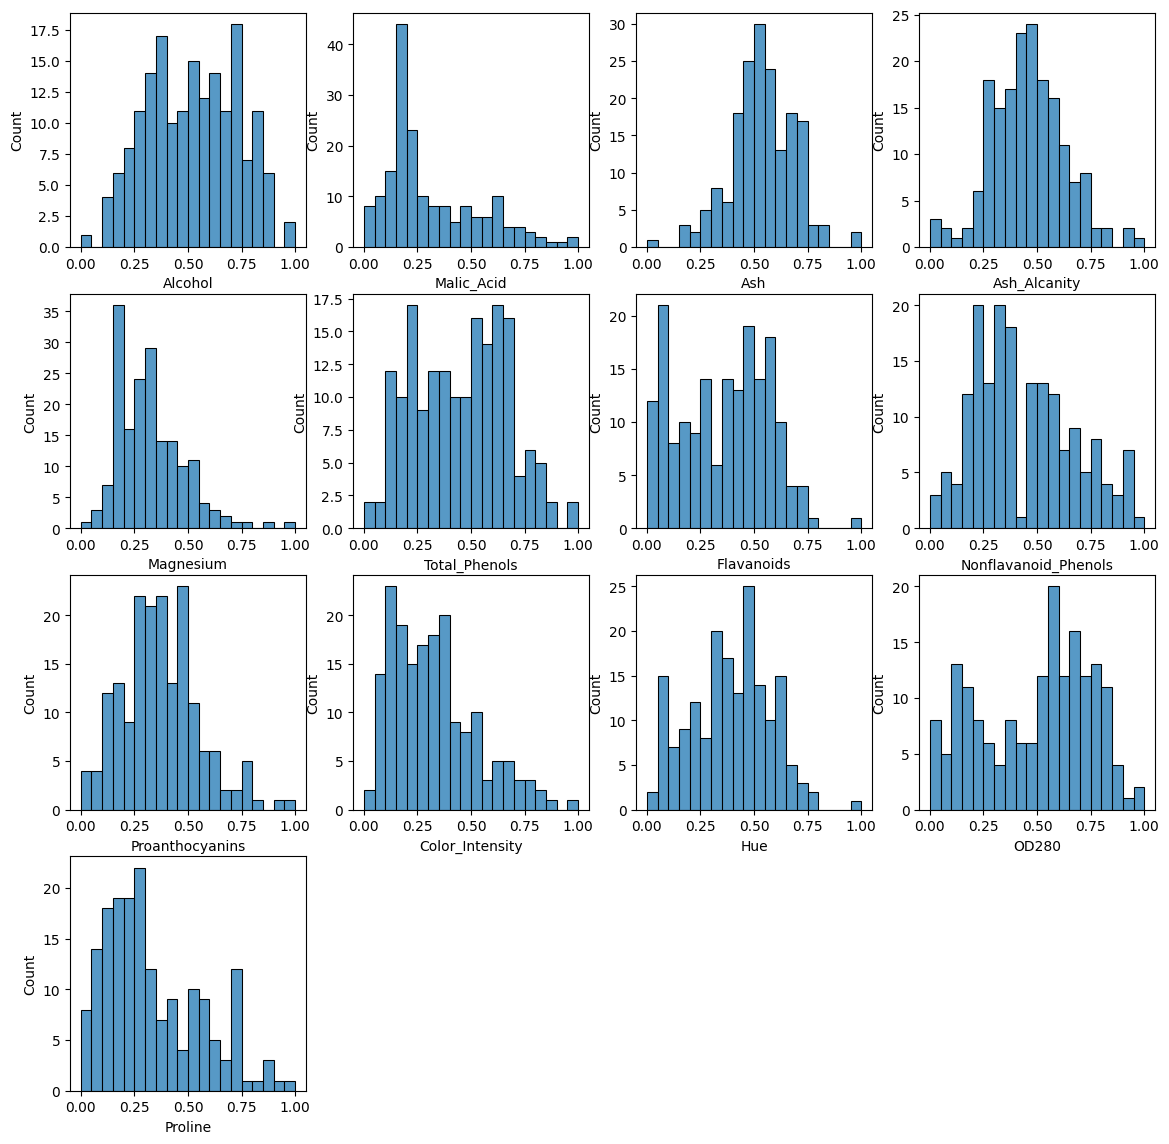

In [22]:
plt.figure(figsize=(14,14))

i = 0
for column in cols:
    i = i + 1
    plt.subplot(4, 4, i)
    sns.histplot(encoded[column], bins=20)

plt.show()

Data nyní máme přeškálovaná, jdeme se podívat na clustering pomocí KMeans.

Prvně se podíváme na určení počtu clusterů pomocí elbow metody.

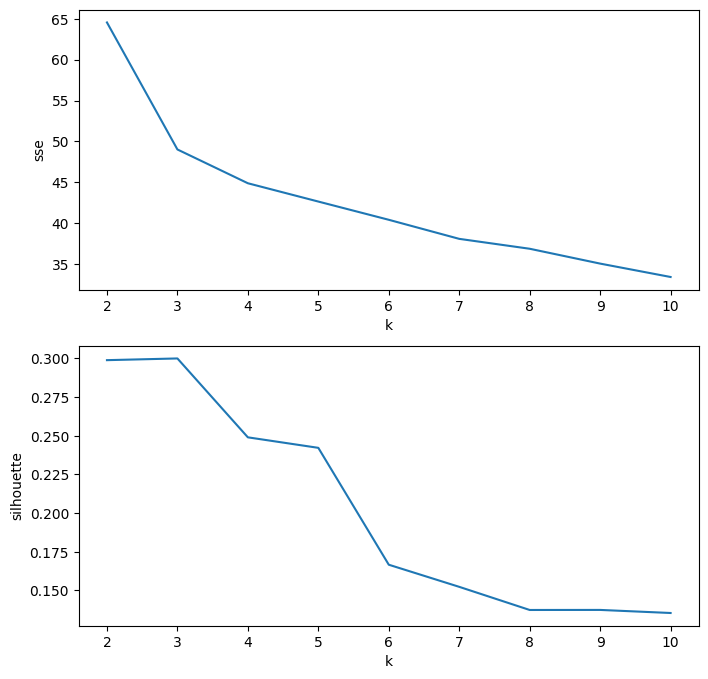

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clustering_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=13).fit(encoded)
    clustering_scores.append({
        'k': k,
        'sse': kmeans.inertia_,
        'silhouette': silhouette_score(encoded, kmeans.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

plt.subplot(2, 1, 2)
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

plt.show()

Když se podíváme elbow metodou na 1. graf, tak největší "loket" je v 3, takže optumum vypovídá o 3 clusterech.
U druhého silhoutte grafu můžeme vidět, že nejlepší počet clusterů je 3, protože máme nejvyšší hodnotu silhoutte score.
Z toho nám vychází, že udělat 3 clustery bude nejlepší.
Pojďme si data rozclusterovat a podívat se na výsledky.

In [13]:
kmeans = KMeans(n_clusters=3, random_state=13).fit(encoded)

kmeansEncoded = encoded.copy() # Uděláme si kopii, protože nechceme mít v encoded datech Labely pro druhý type clusteringu

kmeansEncoded["Labels"] = kmeans.labels_
kmeansEncoded

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Labels
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,0


1. se podíváme na rozložení clusterů

<Axes: xlabel='Labels', ylabel='count'>

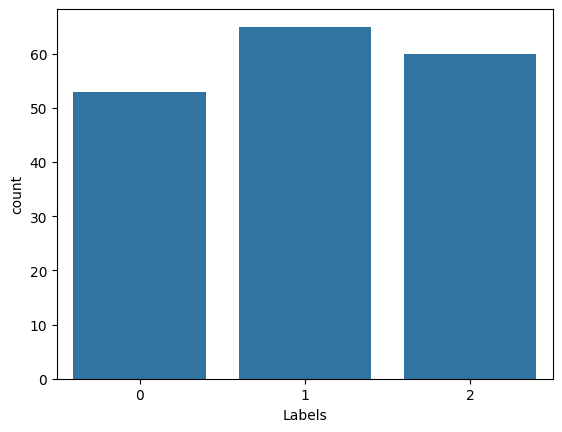

In [14]:
sns.countplot(data=kmeansEncoded, x='Labels')

Jak můžeme vidět, tak clustery jsou pěkně rozdělené, skoro jsou ve stejném poměru.

Prvně se podíváme na průměry hodnot v jednotlivých clusterech.

<Axes: ylabel='Labels'>

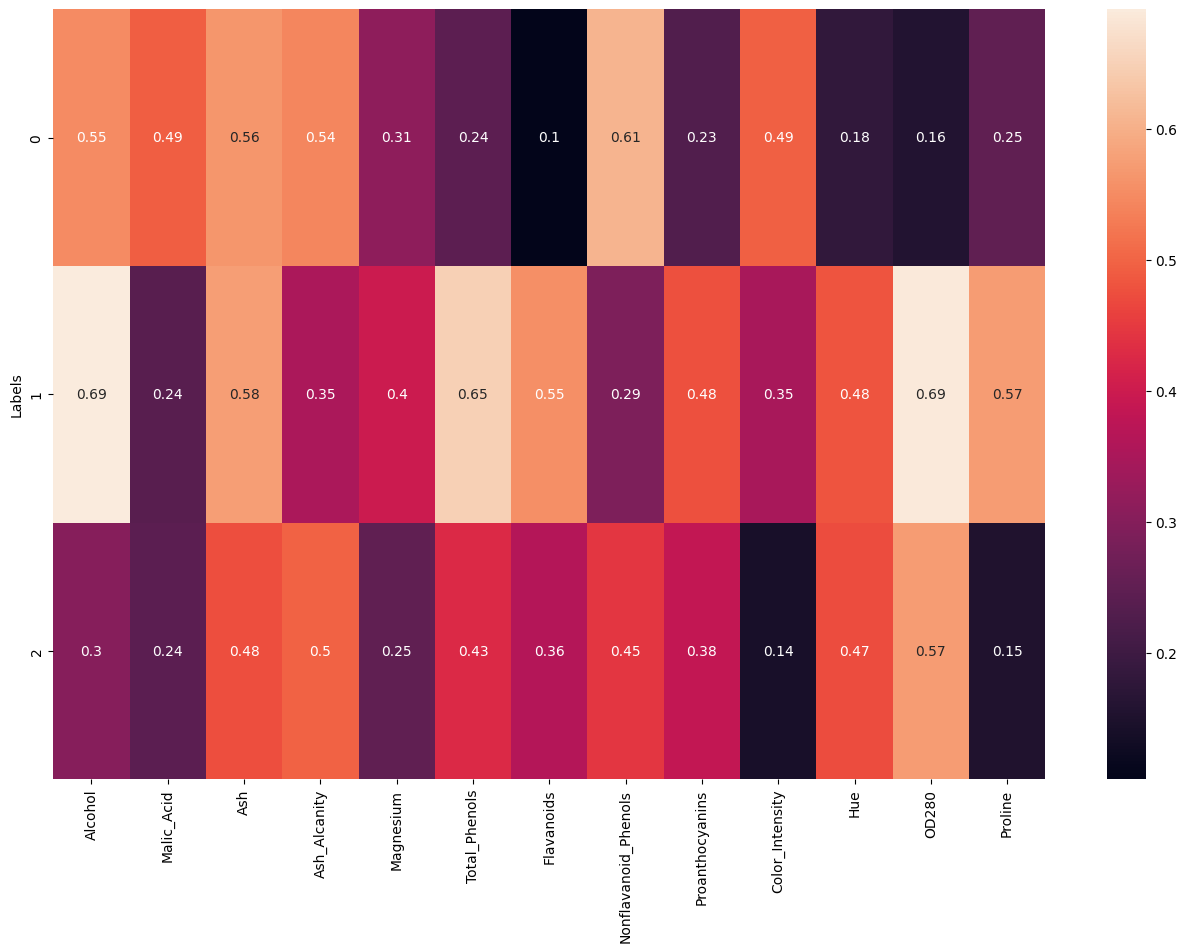

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(kmeansEncoded.groupby("Labels").mean(), annot=True)

Z těchto dat můžeme určit, že například v cluster 1 ovlivnil obsah Alkoholu, celkový obsah fenolů, OD280/OD315, také obsah Prolinu, Obsah popela.

Bylo by ale dobré se podívat na rozdělení reálných hodnot. Tedy si Labely přiřadím k původním datům a podívám se na každý atribut zvlášť a jak se rozdělí podle clusterů.

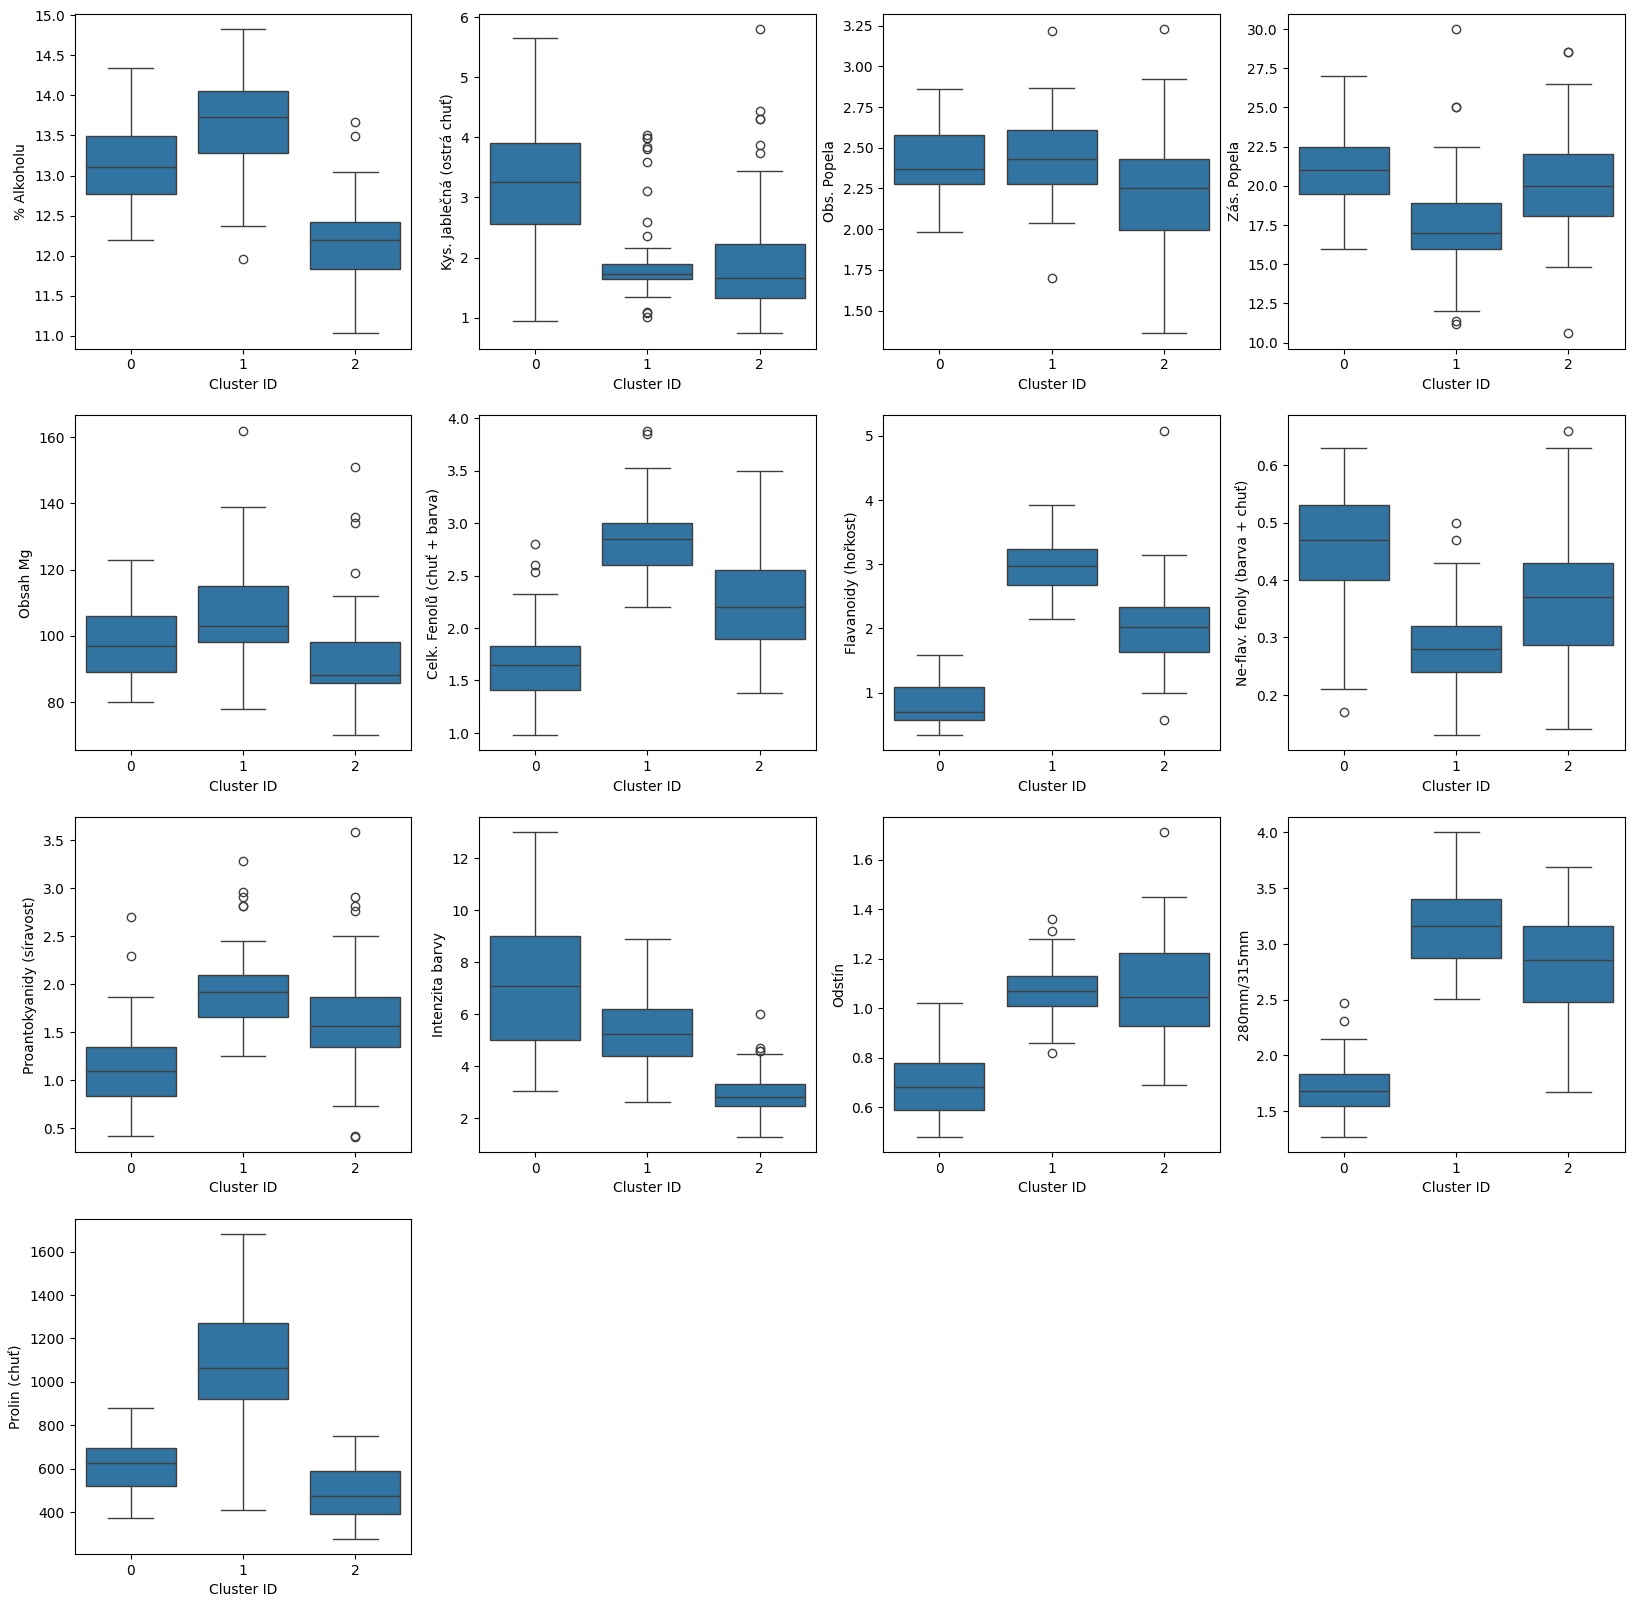

In [16]:
# napasování labelů na původní data
df_labelsKMeans = df_full.copy()
df_labelsKMeans["Labels"] = kmeansEncoded["Labels"]

col_desc = ["% Alkoholu", "Kys. Jablečná (ostrá chuť)", "Obs. Popela", "Zás. Popela", "Obsah Mg", "Celk. Fenolů (chuť + barva)", "Flavanoidy (hořkost)", "Ne-flav. fenoly (barva + chuť)", "Proantokyanidy (síravost)", "Intenzita barvy", "Odstín", "280mm/315mm", "Prolin (chuť)"]

plt.figure(figsize=(20,20))



i = 0
for col in cols:
    i = i + 1
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_labelsKMeans, x="Labels", y=col)
    plt.xlabel("Cluster ID")
    plt.ylabel(col_desc[i - 1])
plt.show()


Nyní, když vidíme rozdělení daného atributu v clusteru, u obsahu popela můžeme vidět, že je všude rozdělený stejně, takže tento atribut nám vlastně nic neříká.

Zdroj k druhům vín: https://www.kupmeto.cz/druhy-vin

Pojďme si definovat co mají jednotlivé clustery (můžeme zkusit i tipnout, co to může být za víno):
#### Cluster 0
- střední obsah alkoholu
- vysoký obsah kyseliny jablečné (hodně ostré víno)
- obsah popela ignorován
- střední obsah hořčíku
- nízky celkový obsah fenolů (chuť a barva)
- nízky obsah flavonoidů (hořkost)
- vysoký obsah ne-flavonoidních fenolů (barva a chuť)
- nízký obsah proanthocyaninů (síravost vína)
- vysoká intenzita barvy (tmavé víno - červené)
- malý odstín
- nízká optická hustota
- střední obsah prolinu (chuť)

Na základě barvy - tmavé, tedy pravděpodobně červené, nebo třeba i černé (hodně tmavé červené), ale zase červená vína neobsahují moc kyseliny jablečné ( https://en.wikipedia.org/wiki/Red_wine#Malolactic_fermentation )
 
#### Cluster 1
- vysoký obsah alkoholu
- nízký obsah kyseliny jablečné (méně ostré víno), tady je menší rozsah, ale je zde i pár outlierů
- obsah popela ignorován
- střední obsah hořčíku
- vysoký celkový obsah fenolů (chuť a barva)
- vysoký obsah flavonoidů (hořkost)
- nízký obsah ne-flavonoidních fenolů (barva a chuť)
- vysoký obsah proanthocyaninů (síravost vína)
- střední intenzita barvy (méně tmavší víno - červené - bílé)
- vysoký odstín, tady je menší rozsah a pár outlierů
- vysoká optická hustota
- vysoký obsah prolinu (chuť)

Na základě barvy to může být buď opět nějaké červené, ale tím že je už středně červené, tak i růžové, nebo bílé víno. Mohlo by to sedět na bílé, protože to míva typicky více alkoholu.

#### Cluster 2
- nízký obsah alkoholu
- střední obsah kyseliny jablečné (středně ostré víno), tady je zase větší rozsah a překvapivě pár outlierů, co lítají o dost výš
- obsah popela ignorován
- nízký obsah hořčíku (tady je taky pár outlierů)
- střední celkový obsah fenolů (chuť a barva)
- střední obsah flavonoidů (hořkost)
- střední obsah ne-flavonoidních fenolů (barva a chuť)
- střední obsah proanthocyaninů (síravost vína)
- nízký obsah intenzity barvy (bílé - růžové)
- vysoký odstín, tady je zase větší rozsah ale žádní outlieři
- vysoká optická hustota
- nízký obsah prolinu (chuť)

Tady je je malá intezita barvy, takže bude spíše bílé, ale také i růžové, protože růžové víno je také světlejší.

Když už máme tady umělou inteligenci, zkusil jsem mu tuto tabulku clusterů předat a nechat ho vyhodnotit, jaké víno by mohlo odpodívat jednotlivému clusteru.
Výsledky:

| Cluster | Barva | Styl |
| --- | --- | --- |
| Cluster 0 | Červená | Suché, plné, těžké |
| Cluster 1| Červená nebo bílá | Suché, vyvážené, prémiové |
| Cluster 2 | Bílé nebo růžové | Suché až polosuché, svěží |

Nyní clustering opět zopakuju, ale s jiným algoritmem.

Vybral jsem si bisecting k-means, který je hiearchický algoritmus, který prvně udělá jeden velký cluster a ten postupně rozděluje, dokuď nedosáhne požadovaného počtu clusterů. Je více efektivní, než KMeans, když je počet clusterrů velký.

Jdeme zase zkusit najít optimální počet clusterů pomocí elbow metody.

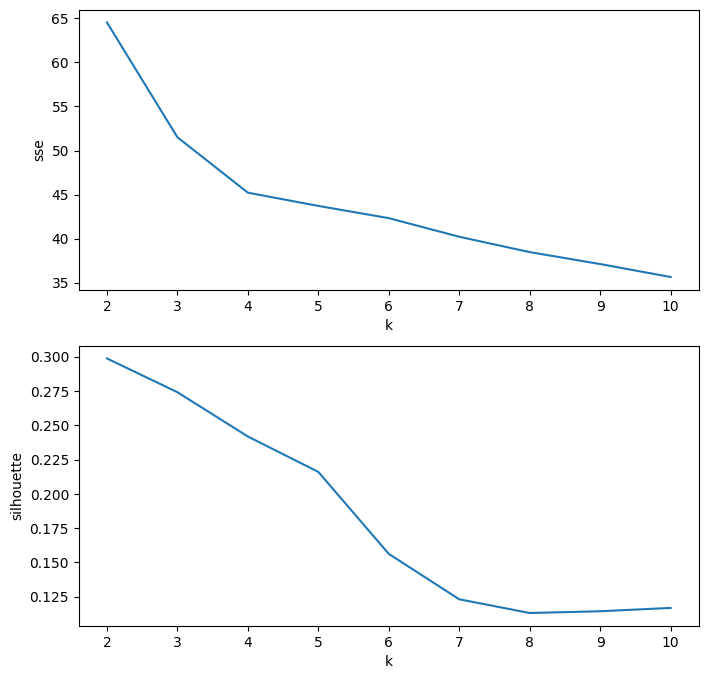

In [17]:
from sklearn.cluster import BisectingKMeans
from sklearn.metrics import silhouette_score

clustering_scores = []
for k in range(2, 11):
    bisKmeans = BisectingKMeans(n_clusters=k, random_state=13).fit(encoded)
    clustering_scores.append({
        'k': k,
        'sse': bisKmeans.inertia_,
        'silhouette': silhouette_score(encoded, bisKmeans.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

plt.subplot(2, 1, 2)
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

plt.show()

Když se opět podíváme, tak u počtu clusterů 3 je největší "loket", který je překvapivě o dost větší, než u KMeans. Dále u silhoutte grafu můžeme vidět, že nejlepší počet clusterů je 3, protože máme nejvyšší hodnotu silhoutte score a opět oproti KMeans je zde o něco větší "spike". Volím proto opět počet clusterů na 3 a pojďme se podívat na výsledky.

In [18]:
bisKmeans = BisectingKMeans(n_clusters=3, random_state=13).fit(encoded)

bisEncoded = encoded.copy() # Sice nebudeme provádět další clustering, ale chcene mechat encoded data čístá od labels

bisEncoded["Labels"] = bisKmeans.labels_
bisEncoded

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Labels
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,0


Opět se podíváme na rozložení clusterů.

<Axes: xlabel='Labels', ylabel='count'>

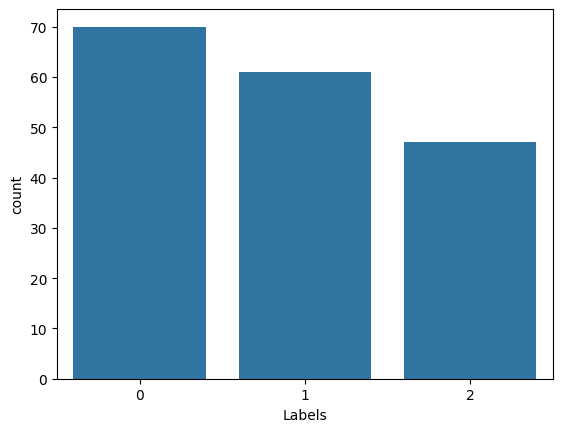

In [19]:
sns.countplot(data=bisEncoded, x='Labels')

Tady můžeme vidět, že rozložení dopadlo jinak, největší zastoupení má cluster 0 a pak to klesá dolů.

Opět se podíváme na průměry hodnot v jednotlivých clusterech.

Nyní si dáme oba grafy vedle sebe a podíváme se, jak se liší.

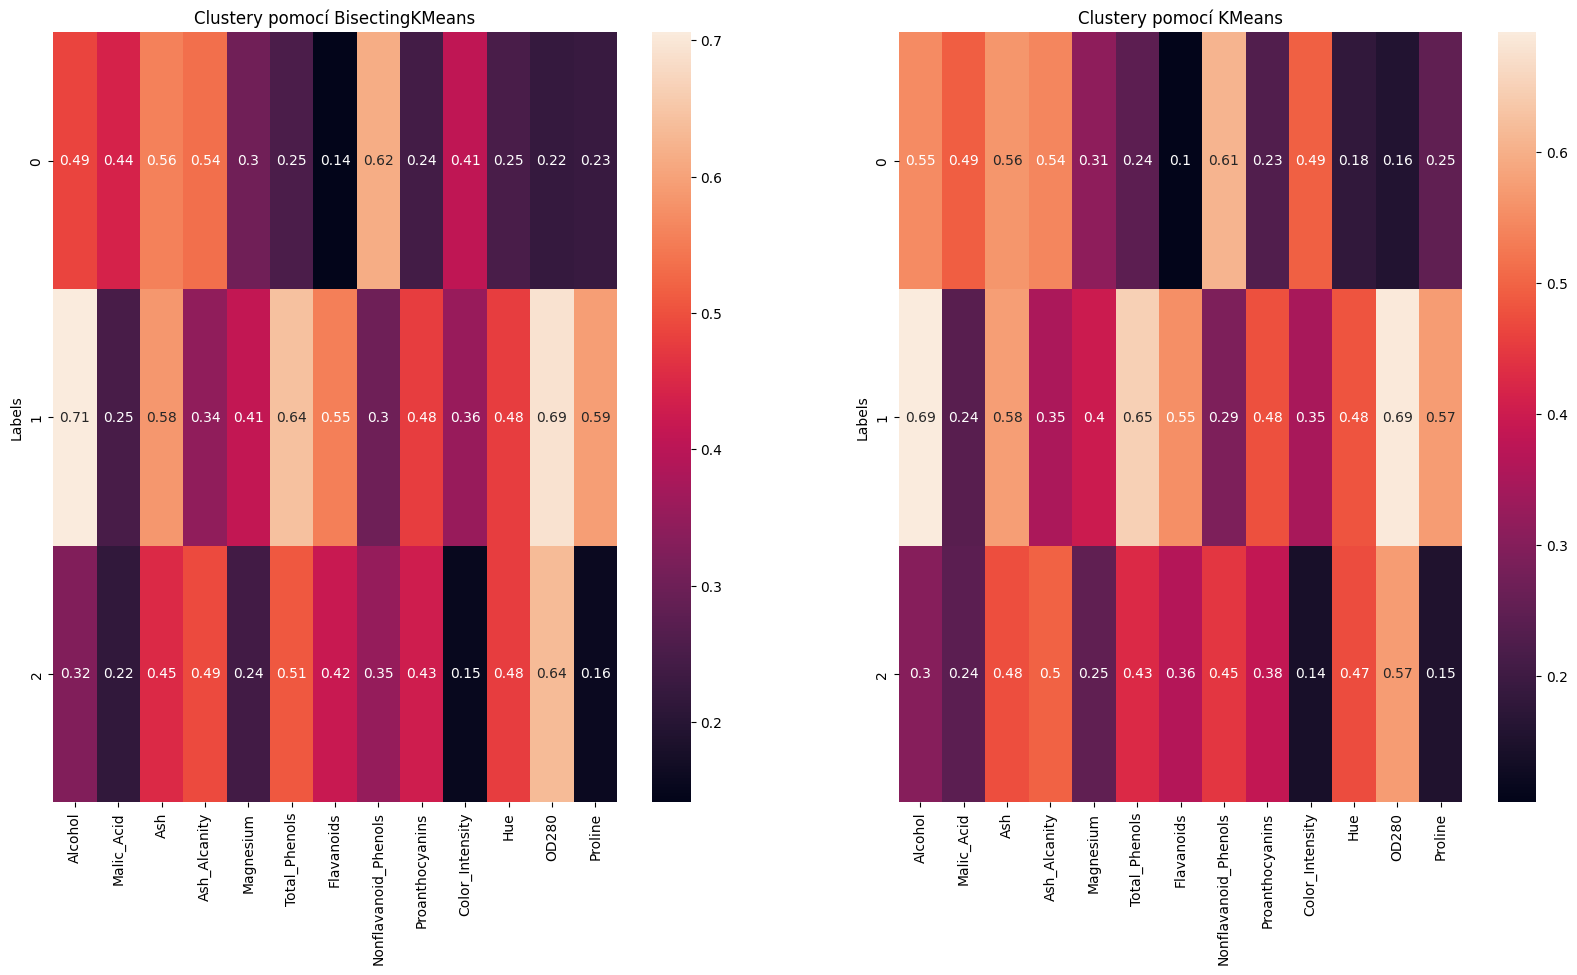

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.heatmap(bisEncoded.groupby("Labels").mean(), annot=True)
plt.title("Clustery pomocí BisectingKMeans")
plt.subplot(1, 2, 2)
sns.heatmap(kmeansEncoded.groupby("Labels").mean(), annot=True)
plt.title("Clustery pomocí KMeans")
plt.show()

Když se podíváme na obě heatmapy, tak vypadají vesměs podobně, až na pár menších odchylek.

Teď se podíváme na rozdělení reálných hodnot. Nyní si ale dáme vždy vedle sebe z 1. clusteringu (KMeans) a graf z 2. clusteringu (Bisecting KMeans).

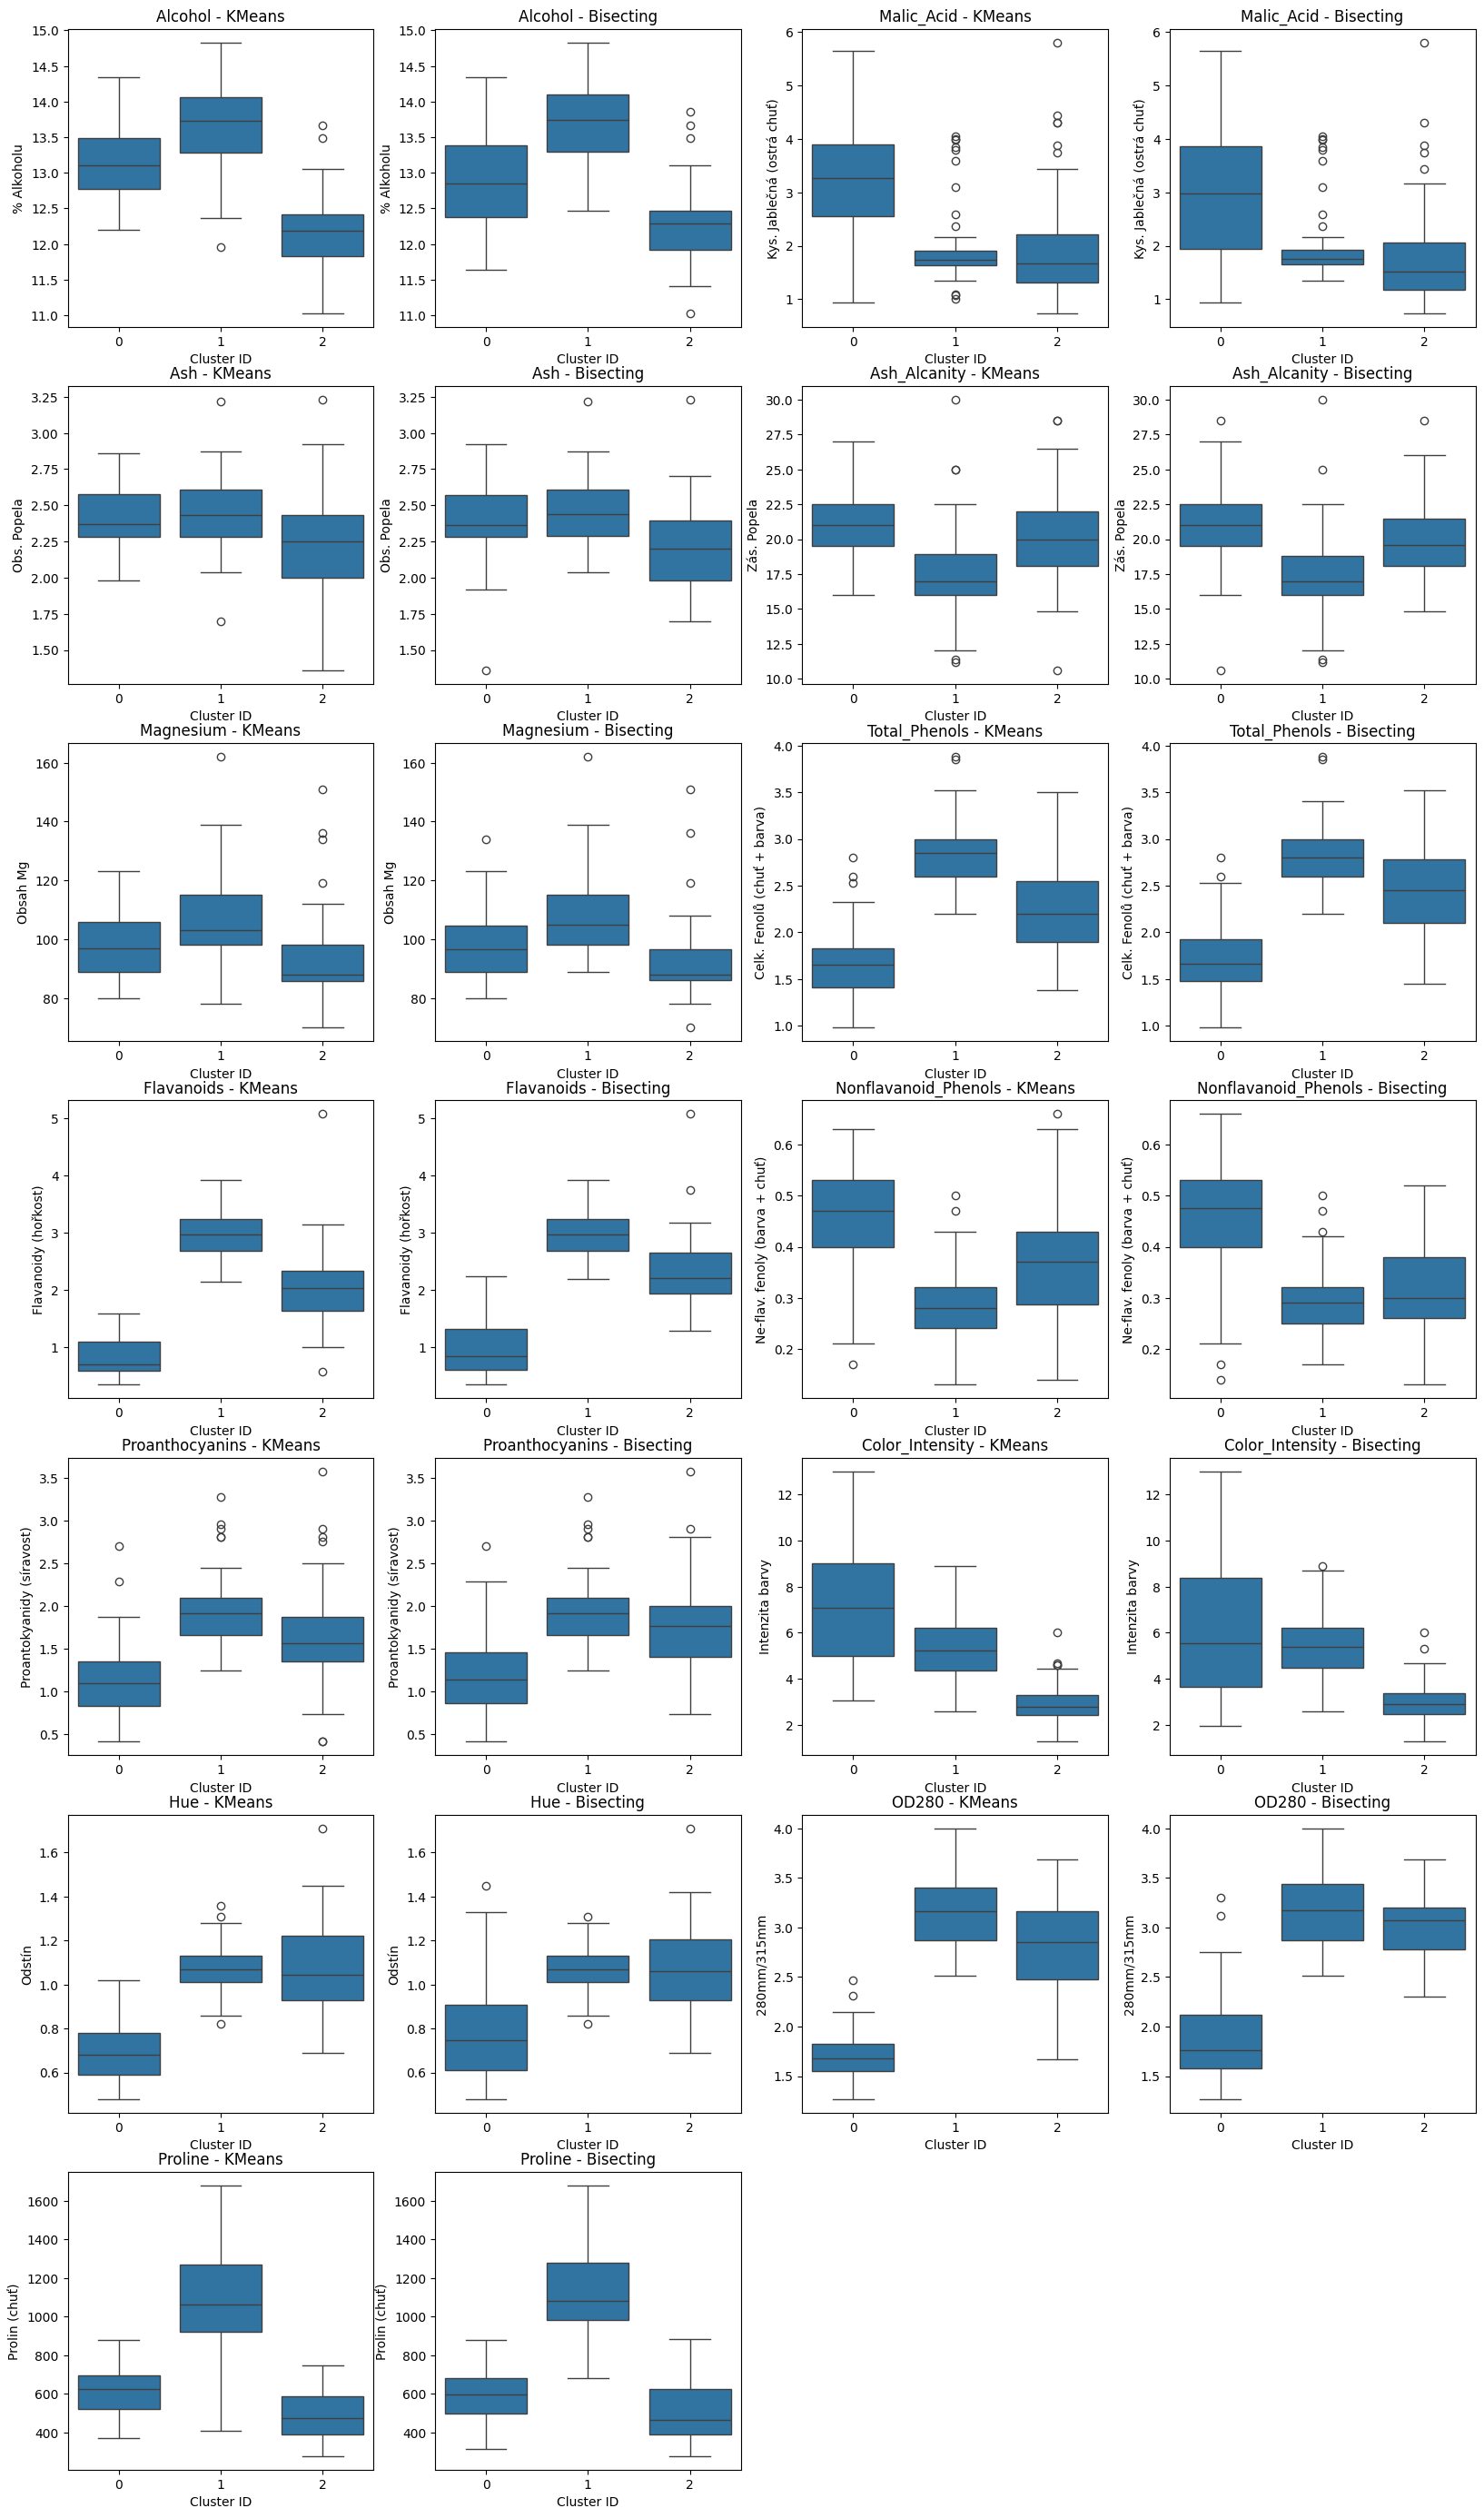

In [21]:
# napasování labelů na původní data
df_labelsBisKMeans = df_full.copy()
df_labelsBisKMeans["Labels"] = bisEncoded["Labels"]


plt.figure(figsize=(20,40))

i = 0
idx = 0;
for col in cols:
    idx = idx + 1
    i = i + 1
    plt.subplot(8, 4, i)
    sns.boxplot(data=df_labelsKMeans, x="Labels", y=col)
    plt.xlabel("Cluster ID")
    plt.ylabel(col_desc[idx - 1])
    plt.title(col + " - " + "KMeans")
    i = i + 1
    plt.subplot(8, 4, i)
    sns.boxplot(data=df_labelsBisKMeans, x="Labels", y=col)
    plt.xlabel("Cluster ID")
    plt.ylabel(col_desc[idx - 1])
    plt.title(col + " - " + "Bisecting")
plt.show()

Overall, když se podíváme na grafy, tak jsou skoro podobné, až na menší detaily, jako střední hodnoty, tedy rozdělení bych udělal určitě podobně, ne-li stejně.

Na závěr, u tohoto datasetu jsem osobně nemohl moc využít například svoje vědomosti, protože s vínem mám nulové zkušenosti. Jak jsem si nazačátku určil rozdělení, tak nedokážu takhle určit. Co jsem se tak dočetl, tak lze vína dělit na sladké, polosuché, suché (hlavní asi rozdělení), což odpovídá 3 clusterům, které jsem určil, jestli to tomu opravdu odpovídá netuším, ale je dost možné, že se v daném clusteru spíše nachází různé kombinace a ne jen přesně jeden specifický druh vína. Rozdělení podle barev vína by odpovídat mohlo, kdy v prvním clusteru budou spíše tmavé (červené/černé), v druhém poté něco mezí, tedy bílé/růžové a v posledním úplné světlé bílé (případně ještě i růžové). Když jsem si ale hledal k jednotlivému vínu jeho podrobnosti (chuť, obsah kyseliny jabléčné, obsah alkoholu atd...) a spároval to s nějakým základním určením, co daný atribut znamená, tak jsem se dostal k tomu, že to spíše daným vínům neodpovídá. Například u clusteru 0 máme že by se mohlo jednat o červené víno, ale neobsahuje moc kyseliny jabléčné, viz KMeans clustering.

Dost mě také překvapilo, že u druhého clusteringu dost vín přešlo z clusterů 1 a 2 do clusteru 0. Zde to může být právě způsobene tím, jak bisecting kmeans funguje, že nejdříve udělá jeden velký cluster a ten postupně rozděluje, za to kmeans pracuje vždy nad celým datasetem.

Na závěr bych si asi příště zvolil vlastní dataset, který by mi byl bližší, ale vzhledem k tomu, že jsem se dostal k projektu celkem pozdě, tak možnost volby vlastního datasetu již nebyla možná.

MIN0150, Patrik Mintěl